### LOGISTIC REGRESSION FOR SENTIMENT ANALYSIS ###

The goal is to implement logistic regression with parameter theta to correctly classify  text sentiment as positve and negative when given a feature vector for each text which contains its positive frequency, negative frequency and a bias term


for every text X a feature vector is assigned having the number of times a word appears with its positive frequency and the number of times it appears with its negative frequency and a bias term
$$X = [1, \sum_{i=1} pos, \sum_{i=1}negative]$$

In [242]:
import numpy as np
import matplotlib.pyplot as plt

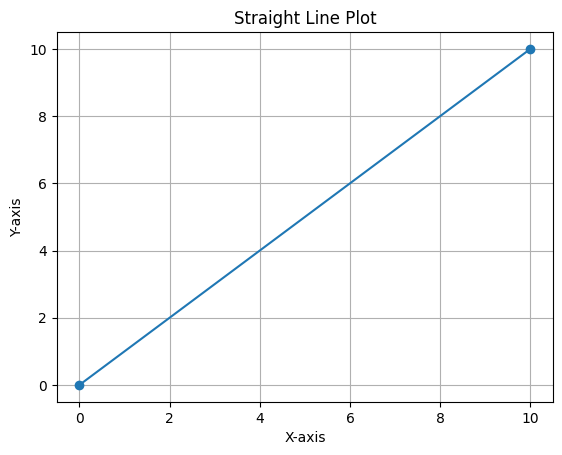

In [243]:
def plot_straight_line(x_start, y_start, x_end, y_end):
    x_values = [x_start, x_end]
    y_values = [y_start, y_end]
    
    plt.plot(x_values, y_values, marker='o')
    plt.title('Straight Line Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()
    
x_start = 0
y_start = 0
x_end = 10
y_end = 10
plot_straight_line(x_start, y_start, x_end, y_end)

we can visualize the sigmoid function with random data

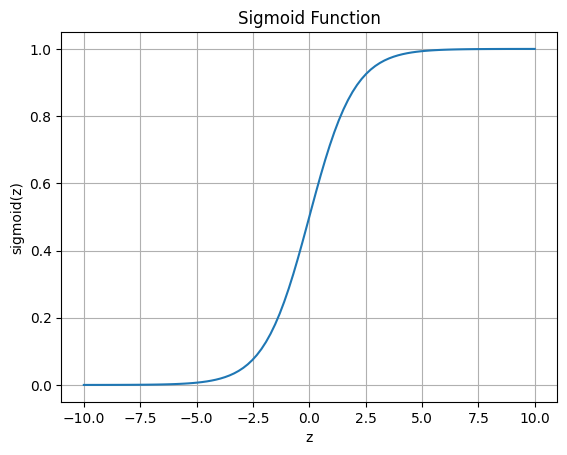

In [244]:
def sigmoid(z):
    z = np.clip(z, -500, 500)           # prevents exp overflow
    return 1 / (1 + np.exp(-z))
def plot_sigmoid():
    z = np.linspace(-10, 10, 100)
    s = sigmoid(z)
    
    plt.plot(z, s)
    plt.title('Sigmoid Function')
    plt.xlabel('z')
    plt.ylabel('sigmoid(z)')
    plt.grid()
    plt.show()
plot_sigmoid()

The equation of a straight line is given by y = mx + b, where m is the slope and b is the y-intercept.
But this cannot be suitable for classification problems where we need to predict discrete classes (e.g., 0 or 1) because classes are continous from (-inf, inf).
To address this, we can use the logistic function (also known as the sigmoid function) to map any real-valued number into the (0, 1) interval. The logistic function is defined as:


 $$sigmoid(z) = \frac{1}{1 + e^{-z}}$$

$\theta$ is an (n+1, 1) matrix containing number of features + a bias term
Logistic cost function = $- 1/m \sum_{i=1}^{m} y(i)log(h(x(i), \theta)) + (1 -y(i))log(1 - h(x(i), theta))$
This is gotten from  trying to maximize the likelihood of theta in the function below, where we try to maximize L(theta) that gives the largest outcome for the function 
        $$L(\theta) = h(x^i, \theta)^{y^i}  (1 - h(x^i, \theta))^{1- y^i}$$

If we look very closely we would realize that we are trying to maximize a function where we are raising the actual class to the predicted class such that our values are always in the range of 0-1. 


if we predicted 0 and the actual class is 1, we can see thatthe function $L(\theta)$ is 0^1 * 1^0, which is zero, but if we predict correctly we can see that 1^1 * 1^1 =1, which is higher than zero,  so we can conclude that the better our prediction to the actual value we maximize that function better, so which values of theta now maximizes the function $(L(\theta))$


so we are looking for the value of theta that will maximize the fucntion $L(\theta)$



The logistic regression cost function is defined as 
$$- 1/m \sum_{i=1}^{m} [y^{i}log(h(x^{i}, \theta)) + (1 -y^{i})log(1 - h(x^{i}, theta)]$$
where we have m training examples and are calculating the loss for each sample i then sum it all together

![alt text](zL6sM-PyTsO-rDPj8r7DrA_89c49e130c854fd3b754a3bcc234897e_Screen-Shot-2020-09-02-at-11.26.30-AM.png)

As you can see in the picture above, if y = 1 and you predict something close to 0, you get a cost close to ∞. The same applies for when y = 0 and you predict something close to 1
On the other hand if you get a prediction equal to the label, you get a cost of 0. In either, case you are trying to minimize $J(\theta)$

Its a fascinating way to look at it, and this incentivizes the model to find the best set of features that will allow it to predict 0 when the actual truth is zero and 1 otherwise.

This is gotten from the Maximum Likelihood Estimation function we have above where we try to maximize the value of function $L(\theta)$ by finding the features of $\theta$ that allows us to do so

Derivation
To show you why the cost function is designed that way, let us take a step back and write up a function that compresses the two cases into one case. 
lets start with probability of label given actual value and feature weights $\theta$
$$P(y|x^{(i)}, \theta) = h(x^i, \theta)^{y^i}  (1 - h(x^i, \theta))^{1- y^i}$$
So since we understand this likelihood function, now we want to find a way to model the entire dataset not just one example
$$L(\theta) = \prod_{i=1}^{m} h(x^i, \theta)^{y^i}  (1 - h(x^i, \theta))^{1- y^i}$$

now to maximize this function, we know from calculus that when a function is at its maximum point, i.e for a concave fucntion such as the maximum likelihood, its derivative is zero!

$$ dL(\theta)/d(\theta) = 0$$
because L is a function of h, and h is a function of $\theta$ we would need to chain rule to find that directly, But if you look at the equation of many examples it can easily explode and is tough to calculate.

This is where we Introduce the Logarithm function, remember the logarithm function is a monotonically increases function meaning, if 20>10, then log 20 > log 10, so when $ dL(\theta)/d(\theta)$ is maximum, $log(dL(\theta)/d(\theta))$ is also maximum

Using the laws of logarithms we can safely arrive at
$$ max_{h(x^{(i)}, \theta)} log (L(\theta)) = log \prod_{i=1}^m  y^{i} h(x^{(i)}) + (1 -y^{i}) log(1 - h(x^i, \theta))$$

Remember that we were maximizing $h(\theta, x^i)$ in the equation above. It turns out that maximizing an equation is thesame as minimizing its negative, you can try it for x^2 vs -x^2

Thats how the logistice cost function is born, because in Machine Learning its more intuitive and better to think of a minimzing a function to find the optimal solution than maximizing it, and so we add a negative sign to end up minimizing the cost as shown
$$- 1/m \sum_{i=1}^{m} [y^{i}log(h(x^{i}, \theta)) + (1 -y^{i})log(1 - h(x^{i}, theta)]$$


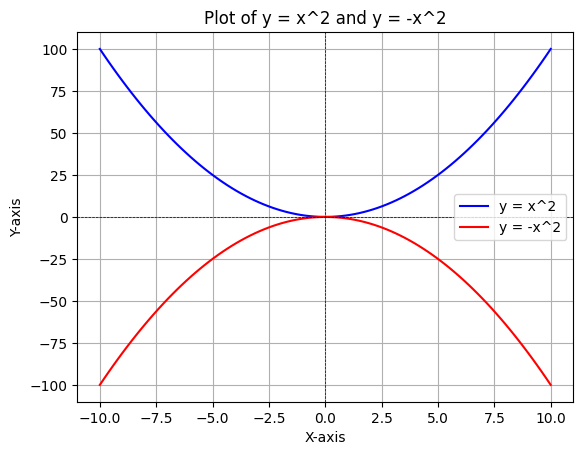

In [245]:
def plot_x_squared_vs_neg_x_squared(x_min, x_max):
    x = np.linspace(x_min, x_max, 100)
    y1 = x**2
    y2 = -x**2
    
    plt.plot(x, y1, label='y = x^2', color='blue')
    plt.plot(x, y2, label='y = -x^2', color='red')
    plt.title('Plot of y = x^2 and y = -x^2')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black',linewidth=0.5, ls='--')
    plt.axvline(0, color='black',linewidth=0.5, ls='--')
    plt.grid(True)
    plt.legend()
    plt.show()
plot_x_squared_vs_neg_x_squared(-10, 10)

#### Logistic Regression: Regression and a Sigmoid

Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

Regression:
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
Note that the $\theta$ values are "weights". we're using a different variable $\theta$ to refer to the weights.

Logistic regression
$$ h(z) = \frac{1}{1+\exp^{-z}}$$
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
We will refer to 'z' as the 'logits'.

We will first initialize our weight parameters

In [246]:
def initialize_parameters(n=3):
    
    return np.random.randn(n, 1) * 0.1
    
initialize_parameters(5)
    

array([[-0.09117961],
       [ 0.19275808],
       [-0.03000613],
       [ 0.03142263],
       [ 0.13034419]])

After initializing our parameters, we can now go on to calculate our cost, which is gotten from our maximum likelihood function $L(\theta)$, we by maximizing the log of the likelihood function, which is ofcourse easier to evaluate than the function itself.
$$L(\theta) = \sum_{i=1}^n h(x^i, \theta)^{y^i}  (1 - h(x^i, \theta))^{1- y^i}$$
$$ \sum_{i=1}^n {y^i}log(h(x^i, \theta)) + {1- y^i}log(1 - h(x^i, \theta)) $$

when this equation is maximum its derivative with respect to $\theta$ is zero, and by maximizing the likelihood function, we minimize its negative, so by adding a negative sign to the likelihood function we get a fucntion we can minimize which is prefered in machine learning applications and easier to deal with. This function is called the cost.
for a single training example i can be written as:
$$J(\theta) = - [{y^i}log(h(x^i, \theta)) + ({1- y^i})log(1 - h(x^i, \theta))]$$

we can then write this in a vectorized implementation for the cost calculated over all functions

$$J(\theta) = -\frac{1}{m} [{Y}log(h(X, \theta)) + ({1- Y}) log(1 - h(X, \theta))]$$



In [247]:
def calculate_cost(X, z, Y, theta):
    m = X.shape[0] # x is a matrix, the number of examples, the numbers of features
    h = sigmoid(z)
    eps = 1e-15
    h = np.clip(h, eps, 1 - eps)        # avoid log(0)
    cost = -1.0/m * (np.dot(Y.T, np.log(h)) + np.dot((1 - Y).T, np.log(1 - h)))
    return float(np.squeeze(cost))


We can now use the gradient descent algorithm which is the standard method for iterating over our data and updating the cost at each step as we move towards the direction steepest descent to find the optimal value of $\theta$ that minimizes this cost.

the details of how we got the cost with respect to $\theta$ can be gotten by simply applying the chain rule.

$$\frac{d(L(\theta))}{d\theta} = -\frac{1}{m} (h(X, \theta) - Y)X^T$$

In [248]:
def gradient_descent(X, Y, num_iters=1000, learning_rate= 0.001):
    cost_history = []
    m, n = X.shape
    Y = Y.reshape(-1, 1)
    theta = initialize_parameters(n)

    for i in range(num_iters):
        z = X @ theta
        h = sigmoid(z)
        cost = calculate_cost(X, z, Y, theta)
        cost_history.append(cost)
        d_theta = (1.0 / m) * (X.T @ (h - Y))
        theta = theta - learning_rate * d_theta

    return cost_history, np.array(theta, dtype=float)
        
    

From the code above we can see that we are using the rate at which the loss changes at with respect to the theta to nudge theta in the direction that minimizes the loss function, This process is called gradient descent and is what we use in logistic regression to find the optimal solution that minimizes the loss in our case here

So we will be using the nltk toolkit to test our algorithm on text data for sentiment analysis.

In [249]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords



In [250]:
review = movie_reviews.fileids()
review

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


lets check our data


In [251]:
nltk.download('movie_reviews')
reviews = []
label = []
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        words = movie_reviews.words(fileid)
        reviews.append(words)
        label.append(category)
        # Process words as needed
reviews[0:2], label[0:2]   

label = [1 if lab == 'pos' else 0 for lab in label]


[nltk_data] Downloading package movie_reviews to C:\Users\DR AKIN
[nltk_data]     O\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Now that weve gotten the movie test dataset from nltk we can test it by extracting features from it as X for all training examples and implementing gradient descent

In [252]:
from utils import preprocess_text
from utils import build_frequency_dict
from utils import extract_features


In [283]:
# Preprocess reviews and split into train/test to avoid data leakage
processed_reviews = [preprocess_text(" ".join(txt)) for txt in reviews]

# Split processed data and labels into training and test sets
proc_train, proc_test, y_train, y_test = train_test_split(processed_reviews, label, test_size=0.2, random_state=42)

# Build frequency dictionary using ONLY the training set (no leakage)
frequency_dict = build_frequency_dict(proc_train, y_train)

# Construct feature matrices using the training frequency dictionary
X_train = np.zeros((len(proc_train), 3))
for i in range(X_train.shape[0]):
    X_train[i, :] = extract_features(proc_train[i], frequency_dict)

X_test = np.zeros((len(proc_test), 3))
for i in range(X_test.shape[0]):
    X_test[i, :] = extract_features(proc_test[i], frequency_dict)

What we have above is the code to build our frequency dictionary containing num of positive frequencies and number of negative frequencies for reviews which have been processed already

$$X = [1, \sum_{i=1} pos, \sum_{i=1}negative]$$

#### Notice we only used the training data for building the frequency dictionary to prevent the logistic regression from getting insights about the test data set if it was contained in the frequency dict #####

We used the numpy clip function in our sigmoid function and cost function to prevent overflow, when we take log(h) and h which is sigmoid(z) is almost zero, we get infinity, and the gradients are not able to update, and when 1/1 + e^-z for the sigmoid is greater than maybe -500, 500 we see a rapid explosion the sigmoid function which leads to h being too large, so we clip z with a min and max value


In [284]:
# Features built above: X_train, X_test


In [285]:
# ensure correct dtypes and that X_train/X_test come from training-only construction
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train.shape, X_test.shape
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train


array([[1.00000e+00, 1.54197e+05, 1.42621e+05],
       [1.00000e+00, 6.03620e+04, 5.62500e+04],
       [1.00000e+00, 1.41408e+05, 1.28688e+05],
       ...,
       [1.00000e+00, 9.20240e+04, 9.02780e+04],
       [1.00000e+00, 9.08080e+04, 8.01990e+04],
       [1.00000e+00, 1.04520e+05, 9.87090e+04]], shape=(1600, 3))

In [286]:
# compute logs of features
X_train[:,1:] = np.log1p(X_train[:,1:])
X_test[:,1:]  = np.log1p(X_test[:,1:])

# standardize using train stats
means = X_train[:,1:].mean(axis=0)
stds  = X_train[:,1:].std(axis=0) + 1e-8
print(means, stds)
X_train[:, 1:] = (X_train[:,1:] - means) / stds
X_test[:,1:]  = (X_test[:,1:]  - means) / stds
X_train

[11.58993485 11.49782388] [0.49845053 0.49213584]


array([[ 1.        ,  0.7143295 ,  0.75208742],
       [ 1.        , -1.16722362, -1.13839459],
       [ 1.        ,  0.54062903,  0.54320377],
       ...,
       [ 1.        , -0.32123406, -0.17711313],
       [ 1.        , -0.34792052, -0.41765924],
       [ 1.        , -0.06578699,  0.004303  ]], shape=(1600, 3))

Because my features are large and skewed and unstandardized it causes gradients to be unstable
It is a common occurence in data where the features are the term frequencies, so because the term frequencies are high sometimes, low other times, the data is skewed with large outliers, thats why we take logarithms again, because remember the logarithm is a monotonically increasing function
log 2 = 0.3, log 10 = 1, log 100 =2 etc so it causes outliers to collapse to values near the other values
ANd scaling just ensures all values are centered around 1


This greatly reduces the noise and skewness of the data for better performance


In [301]:
gradient_descent(X_train, y_train, num_iters=1000, learning_rate= 5)

([0.7038659034156964,
  0.7124235510857985,
  0.7202659484474728,
  0.7422549730263591,
  0.742534125517449,
  0.7694099656115801,
  0.7500698808693398,
  0.7761667916672018,
  0.7482936821100308,
  0.7740311250861902,
  0.7447263822483936,
  0.7703366600352196,
  0.7409746025131319,
  0.7664729005478513,
  0.7372616714023243,
  0.7626301828233676,
  0.7336153008464603,
  0.7588329762573442,
  0.7300376047943112,
  0.7550840934891057,
  0.7265273889293338,
  0.7513835266376768,
  0.7230830541556622,
  0.7477308978974992,
  0.7197029778793071,
  0.7441257799769084,
  0.7163855652296626,
  0.740567738059259,
  0.7131292565457786,
  0.73705633510424,
  0.7099325288590432,
  0.7335911323393396,
  0.7067938964117266,
  0.7301716891751664,
  0.7037119109062056,
  0.7267975631081564,
  0.7006851615943811,
  0.7234683096807291,
  0.6977122752359545,
  0.7201834825019896,
  0.6947919159420463,
  0.7169426333231987,
  0.6919227849179509,
  0.7137453121613737,
  0.689103620117527,
  0.71059106746

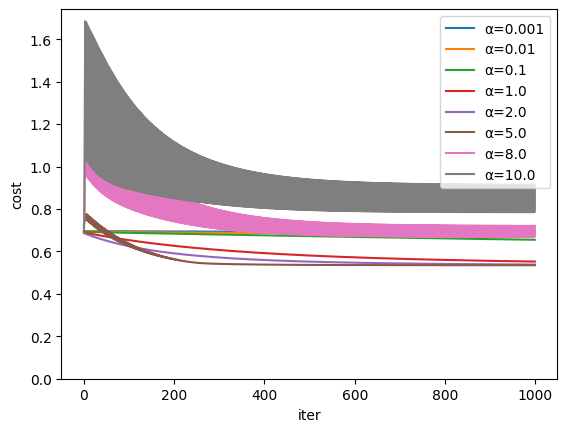

In [302]:
alphas = [0.001, 0.01, 0.1, 1.0, 2.0, 5.0, 8.0, 10.0]
histories = {}
for a in alphas:
    costs, _ = gradient_descent(X_train, y_train, num_iters=1000, learning_rate=a)
    histories[a] = costs

for a in alphas:
    plt.plot(histories[a], label=f"α={a}")
plt.legend(); plt.xlabel("iter"); plt.ylabel("cost"); plt.ylim(bottom=0); plt.show()

In [306]:
cost, theta = gradient_descent(X_train, y_train, num_iters=1000, learning_rate= 0.1)

y_pred = (sigmoid(np.dot(X_test, theta)) >= 0.5).astype(int)
acc = np.mean(y_pred.flatten() == y_test) * 100
acc

np.float64(63.5)

In [304]:
# Diagnostics
probs = sigmoid(np.dot(X_test, theta)).flatten()
print("X_train mean/std:", X_train.mean(0), X_train.std(0))
print("unique X_train rows:", np.unique(X_train, axis=0).shape)
print("theta:", theta.ravel())
print("pred prob min/max:", probs.min(), probs.max())
print("acc:", np.mean((probs >= 0.5).astype(int) == y_test) * 100)

X_train mean/std: [1.00000000e+00 2.14714010e-14 7.86623371e-16] [0.         0.99999998 0.99999998]
unique X_train rows: (1597, 3)
theta: [-0.00270368  1.46870983 -1.3011898 ]
pred prob min/max: 0.32058630460626725 0.6406973203566524
acc: 64.0


Weirdly 5 seems to be the best learning rate